## 시계열(Time Series) 분석
* 시계열 자료(time series)
    * 년도별 계절별 월별 일별 시 분 초별로 시간의 흐름에 따라 관측된 자료
* 시계열자료의 분석 목적:
    * 1) (forecast) 미래에 대한 예측
    * 2) 시스템 또는 확률과정의 이해와 제어(control)

### datetime 오브젝트
* 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
* 날짜를 처리하는 date 오브젝트
* 시간을 처리하는 time 오브젝트
* 날짜와 시간을 처리하는 datetime 오브젝트가 포함되어 있다.

### datetime 오브젝트

In [1]:
from datetime import datetime

In [2]:
now1 = datetime.now()
now1

datetime.datetime(2023, 6, 19, 16, 7, 6, 763905)

In [3]:
now2 = datetime.today()
now2

datetime.datetime(2023, 6, 19, 16, 7, 6, 780859)

In [4]:
# 시간을 직접 입력 인자로 전달
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2023-06-19 16:07:06.797814
1970-01-01 00:00:00
1970-12-12 13:24:34


In [5]:
# datetime 객체에서 datetime 객체를 빼면 시간이 나옴
# datetime 오브젝트를 사용ㅎ는 이유 중 하나는 시간 계산을 할 수 있음
diff1 = t1 - t2
print(diff1)
print(type(diff1))

19527 days, 16:07:06.797814
<class 'datetime.timedelta'>


# 문자열을 datetime 오브젝트로 변환
* 시계열 데이터를 문자열로 저장 -> 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해주어야 함
* to_datetime 메서드를 사용하여 문자열을 datetime 오브제트로 변환

In [6]:
import pandas as pd
import os
ebola = pd.read_csv('../../data/country_timeseries.csv')

In [7]:
# ebola.info()

In [8]:
ebola['date_df'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [9]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')
test_df1

,order_day,date_dt1,date_dt2,date_dt3
0,01/01/15,2015-01-01,2015-01-01,2001-01-15
1,02/01/15,2015-01-02,2015-02-01,2002-01-15
2,03/01/15,2015-01-03,2015-03-01,2003-01-15


In [10]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt1'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
test_df2

,order_day,date_dt1
0,01-01-15,2015-01-01
1,02-01-15,2015-01-02
2,03-01-15,2015-01-03


# 시계열 데이터를 구분해서 추출

In [11]:
# now 메서드는 정밀한 시간 단위까지 표현
now = datetime.now()
now

datetime.datetime(2023, 6, 19, 16, 7, 7, 733195)

In [12]:
# strftime 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 추출하는 방법
# 년,월,일 추출
nowDate = now.strftime('%Y-%m-%d')
nowDate

'2023-06-19'

In [13]:
# 시, 분, 초 추출
nowTime = now.strftime('%H:%M:%S')
nowTime

'16:07:07'

In [14]:
# 시간 형식 지정자
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S %A %a')
nowDatetime

'2023-06-19 16:07:07 Monday Mon'

# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기
* 위에서는 to_datetime 메서드를 사용하여 문자열로 저장된 Date 열을 datetime 오브젝트로 변환
* parse_dates 옵션을 부여하여 문자열을 datetime 으로 불러올 수 있음

In [15]:
ebola1 = pd.read_csv('../../data/country_timeseries.csv', parse_dates=['Date'])
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# datetime 오브젝트에서 날짜 정보 추출하기
* datetime 오브젝트에는 년,월,일과 같은 날짜 정보가 따로 저장(속성 존재)
* datetime 오브젝트에서 날짜 정보를 추출

In [16]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

In [17]:
d1[0].year

2018

## dt 접근자로 시계열 데이터 정리
* datetime 오브젝트는 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있음 

In [18]:
ebola = pd.read_csv('../../data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [19]:
ebola[['Date', 'date_dt']].head()

,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31


In [20]:
# dt 접근자를 사용하지 않고, 인덱스가 3인 데이터의 년, 월, 일 추출
ebola['date_dt'][3].year

2015

In [21]:
ebola['date_dt'][3].month

1

In [22]:
ebola['date_dt'][3].day

2

In [23]:
# dt 접근자로 date_dt 열에 접근한 다음 year 속성을 이용
# 추출한 year을 ebola df의 새로운 열(year) 추가
ebola['year'] = ebola['date_dt'].dt.year
ebola[['Date', 'date_dt', 'year']].head()

,Date,date_dt,year
0,1/5/2015,2015-01-05,2015
1,1/4/2015,2015-01-04,2015
2,1/3/2015,2015-01-03,2015
3,1/2/2015,2015-01-02,2015
4,12/31/2014,2014-12-31,2014


In [24]:
# dt.month, dt.day 접근자를 이용하여 월, 일 데이터를 추출 새로운 열(month, day)로 추가
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
ebola[['Date', 'date_dt', 'year', 'month', 'day']].head()

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3
3,1/2/2015,2015-01-02,2015,1,2
4,12/31/2014,2014-12-31,2014,12,31


## 에볼라 최초 발명일 계산하기

In [25]:
# 데이터가 시간 역순으로 정렬되어 있음
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,3/27/2014,5,103.0,8.0,6.0
118,3/26/2014,4,86.0,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN


In [26]:
# datetime에 있는 min 메서드를 사용해서 에볼라 최초 발병일 : 2014-03-22 확인
print(ebola['date_dt'].min())
print(ebola['date_dt'].max())
type(ebola['date_dt'].min())

2014-03-22 00:00:00
2015-01-05 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [27]:
# Date 열에서 에볼라 최초 발병일을 빼면 에볼라 진행 정도를 알 수 있음
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
ebola[['Date', 'Day', 'outbreak_d']].head()

,Date,Day,outbreak_d
0,1/5/2015,289,289 days
1,1/4/2015,288,288 days
2,1/3/2015,287,287 days
3,1/2/2015,286,286 days
4,12/31/2014,284,284 days


# 파산한 은행 개수 계산하기

In [28]:
# Closing Date, Updated Date 열의 데이터 자료형은 시계열 데이터임을 알 수 있음
banks = pd.read_csv('../../data/banklist.csv')
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [29]:
banks.info() # Closing Date, Updated Date 데이터 자료형은 문자열(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [30]:
banks = pd.read_csv('../../data/banklist.csv', parse_dates=[5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [31]:
banks['closing_quarter'], banks['closing_year'] = \
    (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


In [32]:
# groupby 메서드를 사용하면 연도별로 파산한 은행의 개수를 구할 수 있음
closing_year = banks.groupby(['closing_year']).size()
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

In [33]:
# 연도별로 그룹화한 다음 다시 분기벼로 그룹화하여 출력
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

In [34]:
import numpy as np
np.asarray(closing_year_q.index[1])

array([2001,    1], dtype=int64)

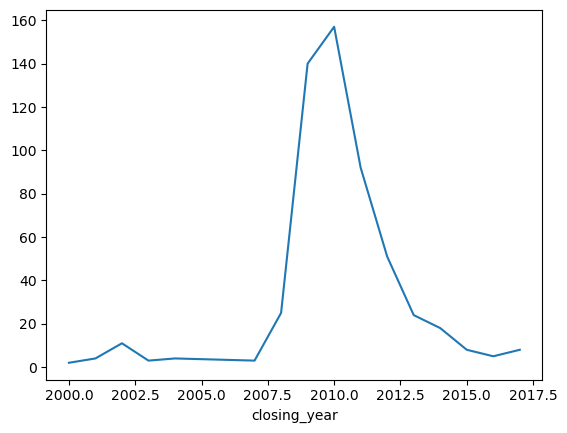

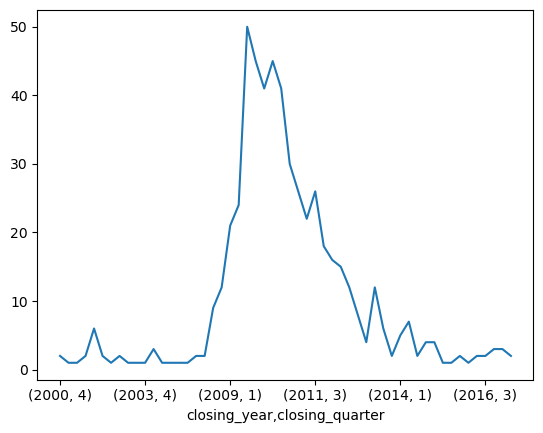

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

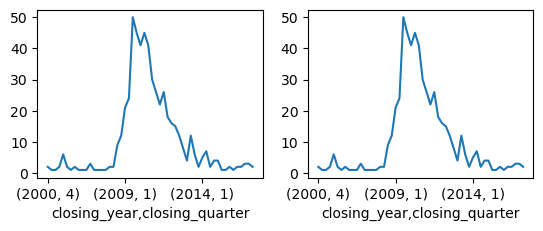

In [36]:
fig = plt.figure()
ax1 = plt.subplot(2,2,1)
ax1 = closing_year_q.plot()

ax2 = plt.subplot(2,2,2)
ax2 = closing_year_q.plot()

plt.show()